# Chargement des données 

In [1]:
from pyhive import hive
import pandas as pd
from IPython.display import display

1. Paramètres de connexion Hive 

In [2]:
hive_host = 'localhost'
hive_port = 10000
hive_username = ' ' 
hive_password = ' '

In [3]:
#conn = None
try:
    # Établir une connexion avec authentification LDAP
    conn = hive.Connection(
        host=hive_host,
        port=hive_port,
        username=hive_username,
        password=hive_password,
        auth='LDAP'  
    )
    print("Connecté à Hive avec succès")
except Exception as e:
    print(f"Erreur lors de la connexion à Hive: {e}")

Connecté à Hive avec succès


2. Chargement de données

In [4]:
# Créer un curseur
cursor=conn.cursor()

In [5]:
def findAll(table) :
    # Exécuter une requête pour récupérer les données de la table "catalogue"
    query = "SELECT * FROM " + table
    cursor.execute(query)

    # Charger les résultats dans un DataFrame Pandas
    data = cursor.fetchall()

    # Récupérer les noms des colonnes
    columns = [desc[0] for desc in cursor.description] 
    df = pd.DataFrame(data, columns=columns)
    print("Select all ",table)

    display(df.head())
    
    return df

    - Catalogue

In [6]:
df_catalogue = findAll("catalogue_co2_view")

Select all  catalogue_co2_view


,catalogue_co2_view.id,catalogue_co2_view.nom,catalogue_co2_view.puissance,catalogue_co2_view.longueur,catalogue_co2_view.nbplaces,catalogue_co2_view.nbportes,catalogue_co2_view.couleur,catalogue_co2_view.occasion,catalogue_co2_view.prix,catalogue_co2_view.marque,catalogue_co2_view.bonusmalus,catalogue_co2_view.rejetco2,catalogue_co2_view.coutenergie
0,1,S80 T6,272,3,5,5,blanc,0,50500,Volvo,0.0,42,72.72727
1,2,S80 T6,272,3,5,5,noir,0,50500,Volvo,0.0,42,72.72727
2,3,S80 T6,272,3,5,5,rouge,0,50500,Volvo,0.0,42,72.72727
3,4,S80 T6,272,3,5,5,gris,1,35350,Volvo,0.0,42,72.72727
4,5,S80 T6,272,3,5,5,bleu,1,35350,Volvo,0.0,42,72.72727


    - Immatriculation

In [7]:
df_immatriculation = findAll("immatriculation_co2_view")

Select all  immatriculation_co2_view


,immatriculation_co2_view.immatriculation,immatriculation_co2_view.marque,immatriculation_co2_view.nom,immatriculation_co2_view.puissance,immatriculation_co2_view.longueur,immatriculation_co2_view.nbplaces,immatriculation_co2_view.nbportes,immatriculation_co2_view.couleur,immatriculation_co2_view.occasion,immatriculation_co2_view.prix,immatriculation_co2_view.bonusmalus,immatriculation_co2_view.rejetco2,immatriculation_co2_view.coutenergie
0,3176 TS 67,Renault,Laguna 2.0T,170,2,5,5,blanc,0,27300,-6000.000000,0.0,206.000000
1,3721 QS 49,Volvo,S80 T6,272,3,5,5,noir,0,50500,0.000000,42.0,72.727272
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,1,5,5,gris,1,16029,-1714.285767,23.0,96.000000
3,3563 LA 55,Peugeot,1007 1.4,75,0,5,5,blanc,1,9625,-3000.000000,15.0,144.166672
4,6963 AX 34,Audi,A2 1.4,75,0,5,5,gris,0,18310,-2400.000000,26.0,191.600006


    - Marketing 

In [8]:
df_marketing = findAll("marketing_view")

Select all  marketing_view


,marketing_view.id,marketing_view.age,marketing_view.sexe,marketing_view.taux,marketing_view.situationfamiliale,marketing_view.nbenfantsacharge,marketing_view.deuxiemevoiture
0,2,35,M,223,CELIBATAIRE,0,0
1,8,43,F,431,CELIBATAIRE,0,0
2,11,79,F,981,EN_COUPLE,2,0
3,16,22,M,411,EN_COUPLE,3,1
4,6,27,F,153,EN_COUPLE,2,0


    - Client

In [9]:
df_client = findAll("client_view")

Select all  client_view


,client_view.id,client_view.age,client_view.sexe,client_view.taux,client_view.situationfamiliale,client_view.nbenfantsacharge,client_view.deuxiemevoiture,client_view.immatriculation
0,13,53,M,237,EN_COUPLE,1,0,7885 CD 50
1,18,84,M,402,CELIBATAIRE,0,0,198 HM 75
2,24,58,M,1390,CELIBATAIRE,0,0,5928 HT 97
3,27,75,M,1186,EN_COUPLE,3,0,45 ZQ 63
4,41,24,F,778,EN_COUPLE,4,0,4974 KV 80


# 1. ANALYSE EXPLORATOIRE DES DONNEES

## Statistiques descriptives / vérification des valeurs

In [10]:
def descriptionDataframe(table, df) :
    # Affichage des statistiques descriptives
    print("Affichage des statistiques descriptives de ", table)
    display(df.describe())
    
    # Affichage des types de données et des valeurs manquantes
    print("Affichage des types de données et des valeurs manquantes  de ", table)
    display(df.info())

    # Vérification des valeurs manquantes
    print("Vérification des valeurs manquantes  de ", table)
    display(df.isnull().sum())
    
    # Vérification des doublons
    print("Vérification des doublons  de ", table)
    duplicates = df.duplicated()
    print(f"Nombre de doublons : {duplicates.sum()}")

In [11]:
descriptionDataframe("Catalogue",df_catalogue)
#dfCatalogue.isnull().sum()

Affichage des statistiques descriptives de  Catalogue


,catalogue_co2_view.puissance,catalogue_co2_view.longueur,catalogue_co2_view.nbplaces,catalogue_co2_view.nbportes,catalogue_co2_view.occasion,catalogue_co2_view.prix,catalogue_co2_view.bonusmalus,catalogue_co2_view.rejetco2,catalogue_co2_view.coutenergie
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,157.592593,1.481481,5.222222,4.814815,0.407407,26668.055556,187.431646,68.462963,324.508324
std,90.551289,1.033648,0.629707,0.580798,0.492264,19050.121112,4731.591803,69.462812,248.393444
min,55.000000,0.000000,5.000000,3.000000,0.000000,7500.000000,-6000.000000,0.000000,72.727270
25%,109.000000,1.000000,5.000000,5.000000,0.000000,16029.000000,-3000.000000,15.000000,96.000000
50%,147.000000,2.000000,5.000000,5.000000,0.000000,20597.500000,-1714.285800,26.000000,206.000000
75%,170.000000,2.000000,5.000000,5.000000,1.000000,30000.000000,5671.586000,152.000000,611.673500
max,507.000000,3.000000,7.000000,5.000000,1.000000,101300.000000,7790.586400,187.000000,749.979700


Affichage des types de données et des valeurs manquantes  de  Catalogue
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   catalogue_co2_view.id           270 non-null    object 
 1   catalogue_co2_view.nom          270 non-null    object 
 2   catalogue_co2_view.puissance    270 non-null    int64  
 3   catalogue_co2_view.longueur     270 non-null    int64  
 4   catalogue_co2_view.nbplaces     270 non-null    int64  
 5   catalogue_co2_view.nbportes     270 non-null    int64  
 6   catalogue_co2_view.couleur      270 non-null    object 
 7   catalogue_co2_view.occasion     270 non-null    int64  
 8   catalogue_co2_view.prix         270 non-null    int64  
 9   catalogue_co2_view.marque       270 non-null    object 
 10  catalogue_co2_view.bonusmalus   270 non-null    float64
 11  catalogue_co2_view.rejetc

None

Vérification des valeurs manquantes  de  Catalogue


catalogue_co2_view.id             0
catalogue_co2_view.nom            0
catalogue_co2_view.puissance      0
catalogue_co2_view.longueur       0
catalogue_co2_view.nbplaces       0
catalogue_co2_view.nbportes       0
catalogue_co2_view.couleur        0
catalogue_co2_view.occasion       0
catalogue_co2_view.prix           0
catalogue_co2_view.marque         0
catalogue_co2_view.bonusmalus     0
catalogue_co2_view.rejetco2       0
catalogue_co2_view.coutenergie    0
dtype: int64

Vérification des doublons  de  Catalogue
Nombre de doublons : 0


In [12]:
descriptionDataframe("Immatriculation",df_immatriculation)

Affichage des statistiques descriptives de  Immatriculation


,immatriculation_co2_view.puissance,immatriculation_co2_view.longueur,immatriculation_co2_view.nbplaces,immatriculation_co2_view.nbportes,immatriculation_co2_view.occasion,immatriculation_co2_view.prix,immatriculation_co2_view.bonusmalus,immatriculation_co2_view.rejetco2,immatriculation_co2_view.coutenergie
count,2.000000e+06,2.000000e+06,2000000.0,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,1.990422e+02,1.671633e+00,5.0,4.868432e+00,3.127450e-01,3.578257e+04,-4.675910e+02,5.824283e+01,2.882441e+02
std,1.371486e+02,1.201701e+00,0.0,4.958084e-01,4.636116e-01,2.577564e+04,4.492288e+03,6.449235e+01,2.317530e+02
min,5.500000e+01,0.000000e+00,5.0,3.000000e+00,0.000000e+00,7.500000e+03,-6.000000e+03,0.000000e+00,7.272727e+01
25%,7.500000e+01,0.000000e+00,5.0,5.000000e+00,0.000000e+00,1.831000e+04,-3.000000e+03,1.500000e+01,9.600000e+01
50%,1.500000e+02,2.000000e+00,5.0,5.000000e+00,0.000000e+00,2.597000e+04,-1.714286e+03,2.600000e+01,1.916000e+02
75%,2.450000e+02,3.000000e+00,5.0,5.000000e+00,1.000000e+00,4.920000e+04,5.671586e+03,1.520000e+02,6.116735e+02
max,5.070000e+02,3.000000e+00,5.0,5.000000e+00,1.000000e+00,1.013000e+05,7.790586e+03,1.870000e+02,7.499797e+02


Affichage des types de données et des valeurs manquantes  de  Immatriculation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   immatriculation_co2_view.immatriculation  object 
 1   immatriculation_co2_view.marque           object 
 2   immatriculation_co2_view.nom              object 
 3   immatriculation_co2_view.puissance        int64  
 4   immatriculation_co2_view.longueur         int64  
 5   immatriculation_co2_view.nbplaces         int64  
 6   immatriculation_co2_view.nbportes         int64  
 7   immatriculation_co2_view.couleur          object 
 8   immatriculation_co2_view.occasion         int64  
 9   immatriculation_co2_view.prix             int64  
 10  immatriculation_co2_view.bonusmalus       float64
 11  immatriculation_co2_view.rejetco2         float64
 12  immatriculation_co2_view.coutenerg

None

Vérification des valeurs manquantes  de  Immatriculation


immatriculation_co2_view.immatriculation    0
immatriculation_co2_view.marque             0
immatriculation_co2_view.nom                0
immatriculation_co2_view.puissance          0
immatriculation_co2_view.longueur           0
immatriculation_co2_view.nbplaces           0
immatriculation_co2_view.nbportes           0
immatriculation_co2_view.couleur            0
immatriculation_co2_view.occasion           0
immatriculation_co2_view.prix               0
immatriculation_co2_view.bonusmalus         0
immatriculation_co2_view.rejetco2           0
immatriculation_co2_view.coutenergie        0
dtype: int64

Vérification des doublons  de  Immatriculation
Nombre de doublons : 24


In [13]:
# Suppression des doublons
df_immatriculation.drop_duplicates(inplace=True)
print(f"Nombre de doublons après suppression : {df_immatriculation.duplicated().sum()}")

Nombre de doublons après suppression : 0


In [14]:
descriptionDataframe("Client",df_client)

Affichage des statistiques descriptives de  Client


,client_view.id,client_view.age,client_view.taux,client_view.nbenfantsacharge,client_view.deuxiemevoiture
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,43.548120,607.935360,1.250440,0.129530
std,28867.657797,18.458569,337.521466,1.388877,0.335787
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,27.000000,420.000000,0.000000,0.000000
50%,50000.500000,41.000000,521.000000,1.000000,0.000000
75%,75000.250000,56.000000,830.000000,2.000000,0.000000
max,100000.000000,84.000000,1399.000000,4.000000,1.000000


Affichage des types de données et des valeurs manquantes  de  Client
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   client_view.id                  100000 non-null  int64 
 1   client_view.age                 100000 non-null  int64 
 2   client_view.sexe                100000 non-null  object
 3   client_view.taux                100000 non-null  int64 
 4   client_view.situationfamiliale  100000 non-null  object
 5   client_view.nbenfantsacharge    100000 non-null  int64 
 6   client_view.deuxiemevoiture     100000 non-null  int64 
 7   client_view.immatriculation     100000 non-null  object
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


None

Vérification des valeurs manquantes  de  Client


client_view.id                    0
client_view.age                   0
client_view.sexe                  0
client_view.taux                  0
client_view.situationfamiliale    0
client_view.nbenfantsacharge      0
client_view.deuxiemevoiture       0
client_view.immatriculation       0
dtype: int64

Vérification des doublons  de  Client
Nombre de doublons : 0


In [15]:
descriptionDataframe("Marketing",df_marketing)

Affichage des statistiques descriptives de  Marketing


,marketing_view.id,marketing_view.age,marketing_view.taux,marketing_view.nbenfantsacharge,marketing_view.deuxiemevoiture
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,45.000000,582.400000,0.950000,0.250000
std,5.91608,19.246326,345.656111,1.276302,0.444262
min,1.00000,19.000000,153.000000,0.000000,0.000000
25%,5.75000,26.750000,408.500000,0.000000,0.000000
50%,10.50000,45.500000,527.000000,0.000000,0.000000
75%,15.25000,59.000000,628.750000,2.000000,0.250000
max,20.00000,80.000000,1396.000000,3.000000,1.000000


Affichage des types de données et des valeurs manquantes  de  Marketing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   marketing_view.id                  20 non-null     int64 
 1   marketing_view.age                 20 non-null     int64 
 2   marketing_view.sexe                20 non-null     object
 3   marketing_view.taux                20 non-null     int64 
 4   marketing_view.situationfamiliale  20 non-null     object
 5   marketing_view.nbenfantsacharge    20 non-null     int64 
 6   marketing_view.deuxiemevoiture     20 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.2+ KB


None

Vérification des valeurs manquantes  de  Marketing


marketing_view.id                    0
marketing_view.age                   0
marketing_view.sexe                  0
marketing_view.taux                  0
marketing_view.situationfamiliale    0
marketing_view.nbenfantsacharge      0
marketing_view.deuxiemevoiture       0
dtype: int64

Vérification des doublons  de  Marketing
Nombre de doublons : 0


## Histogramme / Nuage de points / Matrice de corelaton

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-18wst58a because the default path (/home/vagrant/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


,catalogue_co2_view.puissance,catalogue_co2_view.nbplaces,catalogue_co2_view.nbportes,catalogue_co2_view.prix,catalogue_co2_view.longueur,catalogue_co2_view.bonusmalus,catalogue_co2_view.rejetco2,catalogue_co2_view.coutenergie
catalogue_co2_view.puissance,1.000000,-0.057082,0.310988,0.875451,0.737272,-0.030465,-0.046912,-0.112639
catalogue_co2_view.nbplaces,-0.057082,1.000000,0.112938,-0.081890,0.177686,-0.185674,-0.174036,-0.137936
catalogue_co2_view.nbportes,0.310988,0.112938,1.000000,0.271480,0.458687,-0.171109,-0.147141,-0.104227
catalogue_co2_view.prix,0.875451,-0.081890,0.271480,1.000000,0.677685,0.103902,0.091605,0.031388
catalogue_co2_view.longueur,0.737272,0.177686,0.458687,0.677685,1.000000,0.094991,0.119074,0.125623
catalogue_co2_view.bonusmalus,-0.030465,-0.185674,-0.171109,0.103902,0.094991,1.000000,0.978089,0.856438
catalogue_co2_view.rejetco2,-0.046912,-0.174036,-0.147141,0.091605,0.119074,0.978089,1.000000,0.942914
catalogue_co2_view.coutenergie,-0.112639,-0.137936,-0.104227,0.031388,0.125623,0.856438,0.942914,1.000000


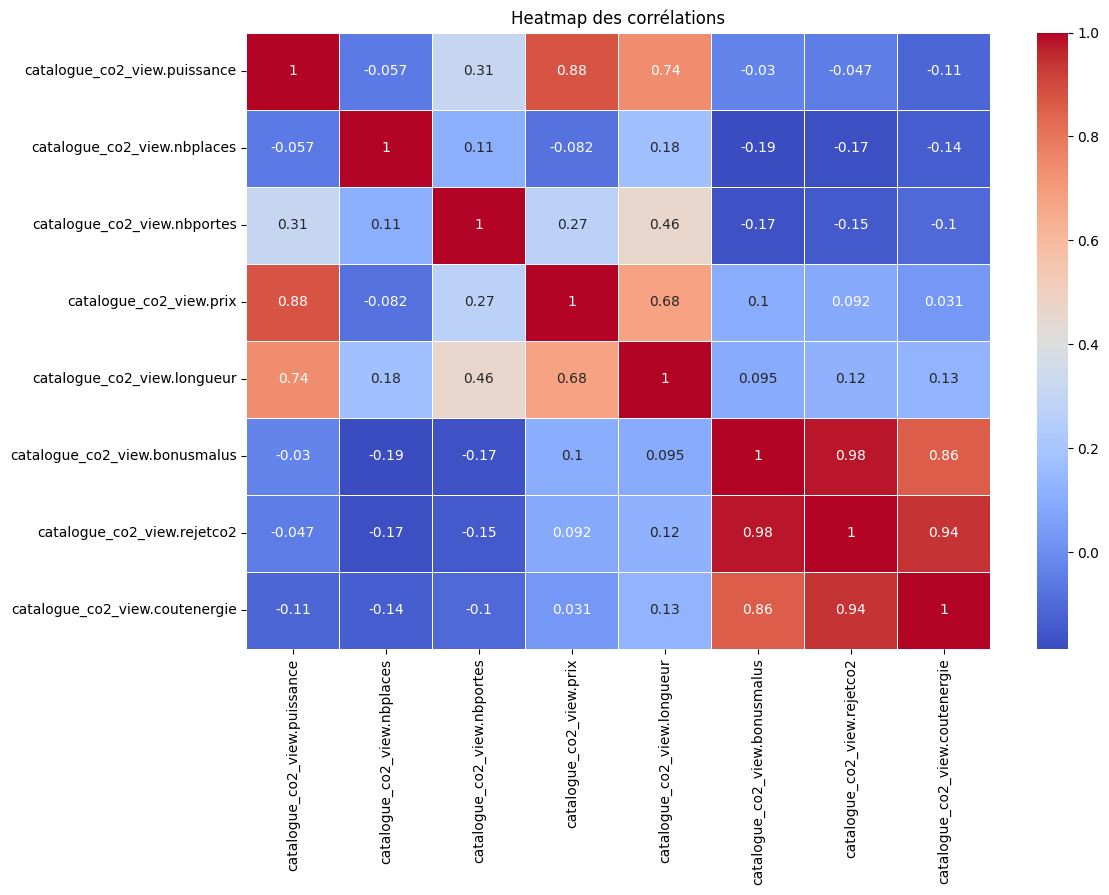

In [17]:
# Exclure les colonnes non numériques spécifiées
df = df_catalogue.copy()

# Calcul de la matrice de corrélation
corr_matrix = df[[
    'catalogue_co2_view.puissance', 
    'catalogue_co2_view.nbplaces', 
    'catalogue_co2_view.nbportes', 
    'catalogue_co2_view.prix', 
    'catalogue_co2_view.longueur',
    'catalogue_co2_view.bonusmalus',
    'catalogue_co2_view.rejetco2',
    'catalogue_co2_view.coutenergie'
]].corr()
display(corr_matrix)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations')
plt.show()


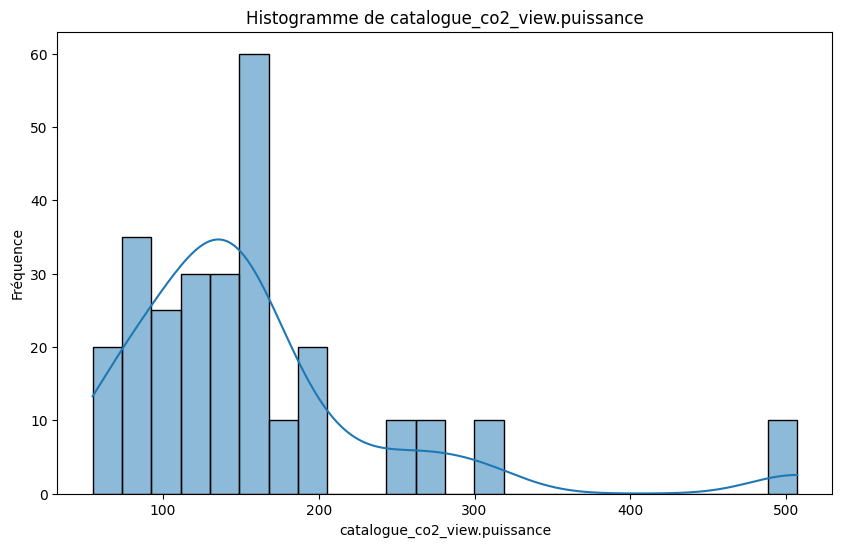

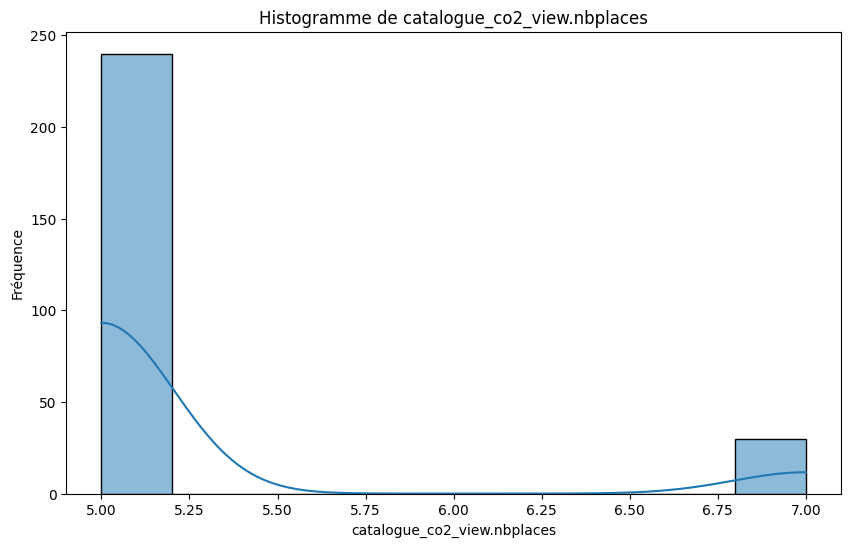

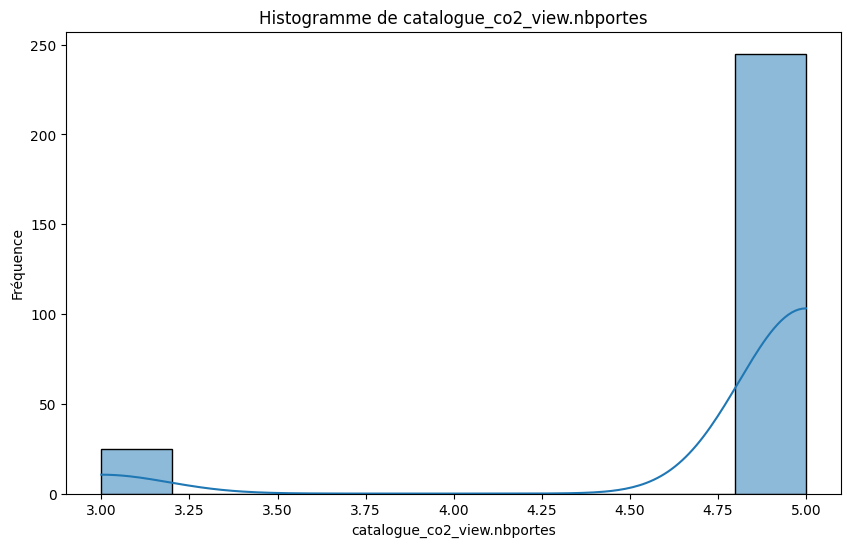

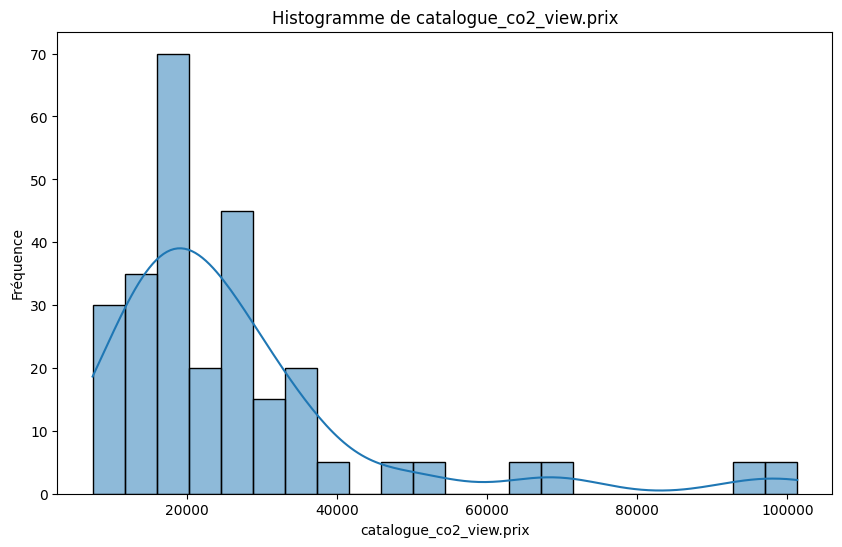

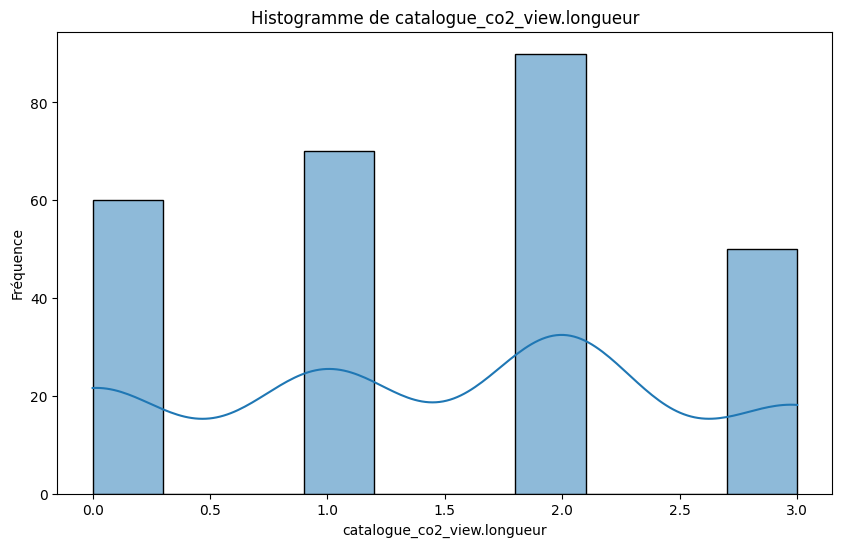

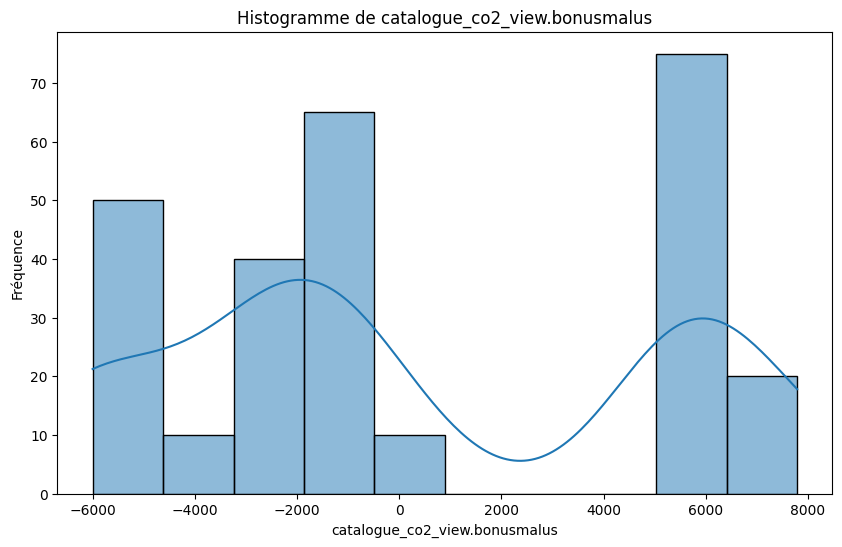

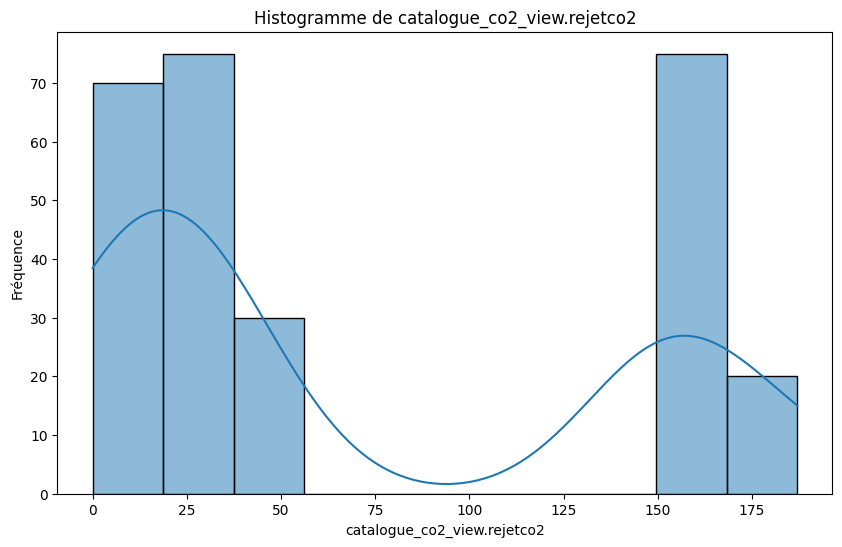

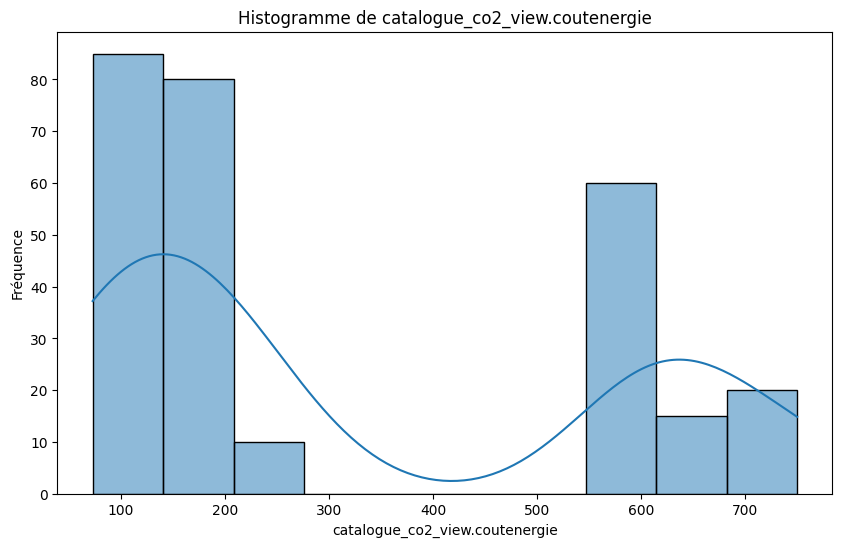

In [18]:
# Affichage des histogrammes pour les colonnes numériques
for col in [
    'catalogue_co2_view.puissance', 
    'catalogue_co2_view.nbplaces', 
    'catalogue_co2_view.nbportes', 
    'catalogue_co2_view.prix', 
    'catalogue_co2_view.longueur',
    'catalogue_co2_view.bonusmalus',
    'catalogue_co2_view.rejetco2',
    'catalogue_co2_view.coutenergie'
]:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()


### Conclusion:

1. Variables importantes:

   - La puissance, le prix et la longueur sont des variables importantes car elles montrent de fortes corrélations avec plusieurs autres variables. Elles peuvent être utilisées pour distinguer les catégories de véhicules.

   - Le nombre de places, le rejet CO2, le bonus et le cout d'énergie montrent peu de corrélations significatives avec les autres variables,mais ils ne doivent pas être exclu sans une analyse plus approfondie de son impact potentiel sur la catégorisation.

   - Le rejet CO2, le bonus et le cout d'énergie sont des variables très correlés cependant leur corrélations avec avec les autres variables ne doivent pas pas être exclu alors on va considerer un seul de ces variables.

3. Variables moins pertinentes: nbportes semble avoir une distribution homogène et pourrait être moins informative pour le clustering.

4. Variables à considérer pour le Clustering: puissance, nbplaces, prix, longueur, coutenergie.

# 2. Categorisation des véhicules

In [19]:
col_predictive = [
    'catalogue_co2_view.puissance', 
    'catalogue_co2_view.nbportes', 
    'catalogue_co2_view.prix', 
    'catalogue_co2_view.longueur',
    'catalogue_co2_view.rejetco2'
]

In [20]:
# Sélectionner les caractéristiques pertinentes
df_catalogue_used = df_catalogue[col_predictive]
df_catalogue_used.head(5)

,catalogue_co2_view.puissance,catalogue_co2_view.nbportes,catalogue_co2_view.prix,catalogue_co2_view.longueur,catalogue_co2_view.rejetco2
0,272,5,50500,3,42
1,272,5,50500,3,42
2,272,5,50500,3,42
3,272,5,35350,3,42
4,272,5,35350,3,42


In [21]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
scaled_df_catalogue_used = scaler.fit_transform(df_catalogue_used)
print("done")

done


In [22]:
#remettre en dataframe le tableau numpy des données catalogué mise à l'echelle pour vérifier
scaled_df_catalogue_used_to_df = pd.DataFrame(scaled_df_catalogue_used, columns=df_catalogue_used.columns)
print("done")

# Print the first few rows of the scaled DataFrame
display(scaled_df_catalogue_used_to_df.head())

done


,catalogue_co2_view.puissance,catalogue_co2_view.nbportes,catalogue_co2_view.prix,catalogue_co2_view.longueur,catalogue_co2_view.rejetco2
0,1.2658,0.319438,1.253336,1.471814,-0.381673
1,1.2658,0.319438,1.253336,1.471814,-0.381673
2,1.2658,0.319438,1.253336,1.471814,-0.381673
3,1.2658,0.319438,0.456589,1.471814,-0.381673
4,1.2658,0.319438,0.456589,1.471814,-0.381673


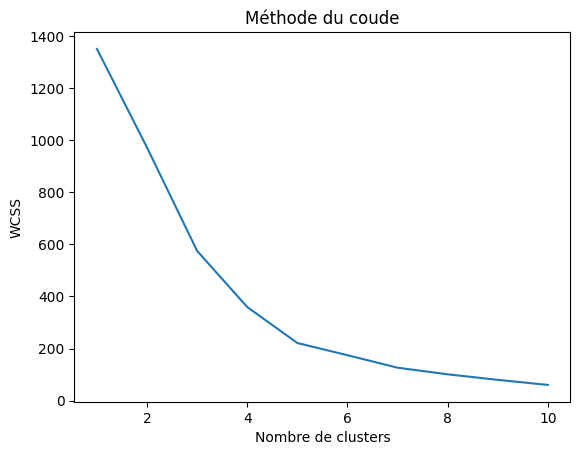

In [23]:
from sklearn.cluster import KMeans

# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df_catalogue_used)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()


D'après la methode de coude, on voit ici que le nombre optimale de cluster est aux alentours de 4

In [24]:
# Application de k-means avec le nombre de clusters choisi
kmeans = KMeans(n_clusters=4, random_state=42)
df_catalogue['catalogue_co2_view.cluster'] = kmeans.fit_predict(scaled_df_catalogue_used)
print("done")

done


In [25]:
# Calculer les caractéristiques moyennes de chaque cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_labels = df_catalogue['catalogue_co2_view.cluster'].unique()
cluster_summary = pd.DataFrame(cluster_centers, columns=df_catalogue_used.columns, index=cluster_labels)

display(cluster_summary)

,catalogue_co2_view.puissance,catalogue_co2_view.nbportes,catalogue_co2_view.prix,catalogue_co2_view.longueur,catalogue_co2_view.rejetco2
2,132.769231,5.0,21132.653846,1.076923e+00,15.769231
0,69.600000,3.0,10508.000000,6.661338e-16,100.400000
1,317.000000,5.0,59405.555556,3.000000e+00,62.555556
3,132.642857,5.0,21674.000000,1.785714e+00,158.714286


In [26]:
cluster_labels = {
    0: 'Citadine',
    1: 'Luxe',
    2: 'Compacte',
    3: 'Familiale'
}
df_catalogue['catalogue_co2_view.categorie'] = df_catalogue['catalogue_co2_view.cluster'].map(cluster_labels)

# Afficher le catalogue avec les catégories assignées
df_catalogue.head()

,catalogue_co2_view.id,catalogue_co2_view.nom,catalogue_co2_view.puissance,catalogue_co2_view.longueur,catalogue_co2_view.nbplaces,catalogue_co2_view.nbportes,catalogue_co2_view.couleur,catalogue_co2_view.occasion,catalogue_co2_view.prix,catalogue_co2_view.marque,catalogue_co2_view.bonusmalus,catalogue_co2_view.rejetco2,catalogue_co2_view.coutenergie,catalogue_co2_view.cluster,catalogue_co2_view.categorie
0,1,S80 T6,272,3,5,5,blanc,0,50500,Volvo,0.0,42,72.72727,2,Compacte
1,2,S80 T6,272,3,5,5,noir,0,50500,Volvo,0.0,42,72.72727,2,Compacte
2,3,S80 T6,272,3,5,5,rouge,0,50500,Volvo,0.0,42,72.72727,2,Compacte
3,4,S80 T6,272,3,5,5,gris,1,35350,Volvo,0.0,42,72.72727,2,Compacte
4,5,S80 T6,272,3,5,5,bleu,1,35350,Volvo,0.0,42,72.72727,2,Compacte


# 3. Application des catégories de véhicules définies aux données des Immatriculations

In [27]:
df_immatriculation.head()

,immatriculation_co2_view.immatriculation,immatriculation_co2_view.marque,immatriculation_co2_view.nom,immatriculation_co2_view.puissance,immatriculation_co2_view.longueur,immatriculation_co2_view.nbplaces,immatriculation_co2_view.nbportes,immatriculation_co2_view.couleur,immatriculation_co2_view.occasion,immatriculation_co2_view.prix,immatriculation_co2_view.bonusmalus,immatriculation_co2_view.rejetco2,immatriculation_co2_view.coutenergie
0,3176 TS 67,Renault,Laguna 2.0T,170,2,5,5,blanc,0,27300,-6000.000000,0.0,206.000000
1,3721 QS 49,Volvo,S80 T6,272,3,5,5,noir,0,50500,0.000000,42.0,72.727272
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,1,5,5,gris,1,16029,-1714.285767,23.0,96.000000
3,3563 LA 55,Peugeot,1007 1.4,75,0,5,5,blanc,1,9625,-3000.000000,15.0,144.166672
4,6963 AX 34,Audi,A2 1.4,75,0,5,5,gris,0,18310,-2400.000000,26.0,191.600006


In [28]:
col_predictive_immatriculation = [
    'immatriculation_co2_view.puissance', 
    'immatriculation_co2_view.longueur', 
    'immatriculation_co2_view.nbportes', 
    'immatriculation_co2_view.prix',
    'immatriculation_co2_view.rejetco2'
]

In [29]:
# Sélectionner les caractéristiques pertinentes pour les immatriculations
df_immatriculation_used = df_immatriculation[col_predictive_immatriculation]

df_immatriculation_used.head()

,immatriculation_co2_view.puissance,immatriculation_co2_view.longueur,immatriculation_co2_view.nbportes,immatriculation_co2_view.prix,immatriculation_co2_view.rejetco2
0,170,2,5,27300,0.0
1,272,3,5,50500,42.0
2,150,1,5,16029,23.0
3,75,0,5,9625,15.0
4,75,0,5,18310,26.0


In [30]:
# Normalisation des données
scalerImma = StandardScaler()
scaled_df_immatriculation_used = scalerImma.fit_transform(df_immatriculation_used)
print("done scaling")

done scaling


In [31]:
# Utiliser le modèle de clustering pour prédire les clusters des données d'immatriculation
df_immatriculation['immatriculation_co2_view.cluster'] = kmeans.predict(scaled_df_immatriculation_used)

# Mapper les clusters prédits aux catégories de véhicules correspondantes
cluster_labels = {
    0: 'Citadine',
    1: 'Luxe',
    2: 'Compacte',
    3: 'Familiale'
}
df_immatriculation['immatriculation_co2_view.categorie'] = df_immatriculation['immatriculation_co2_view.cluster'].map(cluster_labels)
print("done")

# Afficher le DataFrame d'immatriculation avec les catégories assignées
df_immatriculation.head()


done


,immatriculation_co2_view.immatriculation,immatriculation_co2_view.marque,immatriculation_co2_view.nom,immatriculation_co2_view.puissance,immatriculation_co2_view.longueur,immatriculation_co2_view.nbplaces,immatriculation_co2_view.nbportes,immatriculation_co2_view.couleur,immatriculation_co2_view.occasion,immatriculation_co2_view.prix,immatriculation_co2_view.bonusmalus,immatriculation_co2_view.rejetco2,immatriculation_co2_view.coutenergie,immatriculation_co2_view.cluster,immatriculation_co2_view.categorie
0,3176 TS 67,Renault,Laguna 2.0T,170,2,5,5,blanc,0,27300,-6000.000000,0.0,206.000000,0,Citadine
1,3721 QS 49,Volvo,S80 T6,272,3,5,5,noir,0,50500,0.000000,42.0,72.727272,0,Citadine
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,1,5,5,gris,1,16029,-1714.285767,23.0,96.000000,0,Citadine
3,3563 LA 55,Peugeot,1007 1.4,75,0,5,5,blanc,1,9625,-3000.000000,15.0,144.166672,0,Citadine
4,6963 AX 34,Audi,A2 1.4,75,0,5,5,gris,0,18310,-2400.000000,26.0,191.600006,0,Citadine


# 4. Fusion des données Clients et Immatriculations

In [32]:
# Fusionner les deux DataFrames sur la colonne 'immatriculation'
df_fusion = pd.merge(df_client, df_immatriculation, how='inner', left_on='client_view.immatriculation', right_on='immatriculation_co2_view.immatriculation')
print("Fusion done")

# Afficher les premières lignes du DataFrame fusionné
df_fusion.head()

Fusion done


,client_view.id,client_view.age,client_view.sexe,client_view.taux,client_view.situationfamiliale,client_view.nbenfantsacharge,client_view.deuxiemevoiture,client_view.immatriculation,immatriculation_co2_view.immatriculation,immatriculation_co2_view.marque,...,immatriculation_co2_view.nbplaces,immatriculation_co2_view.nbportes,immatriculation_co2_view.couleur,immatriculation_co2_view.occasion,immatriculation_co2_view.prix,immatriculation_co2_view.bonusmalus,immatriculation_co2_view.rejetco2,immatriculation_co2_view.coutenergie,immatriculation_co2_view.cluster,immatriculation_co2_view.categorie
0,13,53,M,237,EN_COUPLE,1,0,7885 CD 50,7885 CD 50,Volvo,...,5,5,blanc,0,50500,0.000000,42.0,72.727272,0,Citadine
1,13,53,M,237,EN_COUPLE,1,0,7885 CD 50,7885 CD 50,Renault,...,5,5,rouge,1,19110,-6000.000000,0.0,206.000000,0,Citadine
2,18,84,M,402,CELIBATAIRE,0,0,198 HM 75,198 HM 75,Volkswagen,...,5,3,noir,0,12200,-1714.285767,23.0,96.000000,1,Luxe
3,24,58,M,1390,CELIBATAIRE,0,0,5928 HT 97,5928 HT 97,Audi,...,5,5,noir,0,18310,-2400.000000,26.0,191.600006,0,Citadine
4,27,75,M,1186,EN_COUPLE,3,0,45 ZQ 63,45 ZQ 63,Mercedes,...,5,5,blanc,0,101300,7790.586426,187.0,749.979675,3,Familiale


In [33]:
columns_to_drop = ["immatriculation_co2_view.immatriculation", "immatriculation_co2_view.marque", "immatriculation_co2_view.nom",
                   "immatriculation_co2_view.puissance", "immatriculation_co2_view.longueur", "immatriculation_co2_view.nbplaces",
                   "immatriculation_co2_view.nbportes", "immatriculation_co2_view.couleur", "immatriculation_co2_view.occasion",
                   "immatriculation_co2_view.prix", "immatriculation_co2_view.cluster", "immatriculation_co2_view.rejetco2",
                   "immatriculation_co2_view.bonusmalus", "immatriculation_co2_view.coutenergie", "client_view.immatriculation"]

df_fusion_new = df_fusion.drop(columns=columns_to_drop)

In [34]:
df_fusion_new.head()

,client_view.id,client_view.age,client_view.sexe,client_view.taux,client_view.situationfamiliale,client_view.nbenfantsacharge,client_view.deuxiemevoiture,immatriculation_co2_view.categorie
0,13,53,M,237,EN_COUPLE,1,0,Citadine
1,13,53,M,237,EN_COUPLE,1,0,Citadine
2,18,84,M,402,CELIBATAIRE,0,0,Luxe
3,24,58,M,1390,CELIBATAIRE,0,0,Citadine
4,27,75,M,1186,EN_COUPLE,3,0,Familiale


In [35]:
df_fusion_new.to_csv('/vagrant/tpa_groupe_14/data/fusion.csv', index=False, encoding='utf-8')

### Mettre les données de fusion entre immatriculations et clients dans hdfs

In [36]:
!hadoop fs -mkdir -p /tpa_groupe_14/data/fusion

In [37]:
!hadoop fs -put -f /vagrant/tpa_groupe_14/data/fusion.csv /tpa_groupe_14/data/fusion

In [38]:
!hadoop fs -ls /tpa_groupe_14/data/fusion

Found 1 items
-rw-r--r--   1 vagrant supergroup    3880052 2024-06-03 15:13 /tpa_groupe_14/data/fusion/fusion.csv
